# UsedCarSales Project

#### Business Problem 

Discount Motors, a used car dealership in the UK. The dealership is expanding and has hired a large number of junior salespeople. Although promising, these junior employees have difficulties pricing used cars that arrive at the dealership. Sales have declined 18% in recent months. The sales team have reached out to the data science team to get help with this problem.

#### Customer Question
The sales team wants to know:

● Can you predict the price that a used car should be listed at based on features of the
car?

#### Success Criteria
It is known that cars that are more than £1500 from the estimated price will not sell. The sales
team wants to know whether you can make predictions within this range.

Let's import our necessary libraries

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score,mean_squared_error
plt.style.use('ggplot')

## Data Validation

In [5]:
car_sales= pd.read_csv("./datasets/toyota.csv")
display(car_sales.head())
car_sales.shape

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


(6738, 9)

The data consists of 6739 rows and 9 columns.

In [6]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [7]:
car_sales.nunique()

model             18
year              23
price           2114
transmission       4
mileage         5699
fuelType           4
tax               29
mpg               81
engineSize        16
dtype: int64

In [8]:
car_sales['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [9]:
car_sales['fuelType'].unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

In [10]:
car_sales['engineSize'].unique()

array([2. , 1.8, 1.2, 1.6, 1.4, 2.5, 2.2, 1.5, 1. , 1.3, 0. , 2.4, 3. ,
       2.8, 4.2, 4.5])

In [11]:
car_sales.describe() 

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In this section, we validated the data and examined whether it has unique values, data types and negative values. I'd say the data seems consistent at first. Keep reviewing!

# Exploratory Analysis

[Text(0.5, 1.0, 'The Distribution of Target Variable - Price (Log Scale)')]

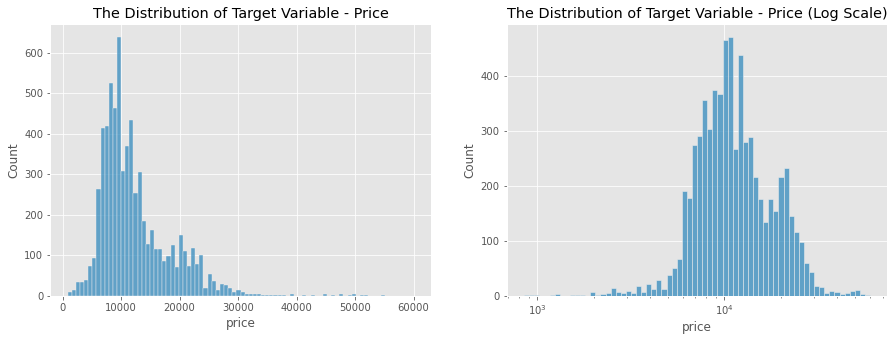

In [12]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(car_sales['price'],ax=axes[0]).set(title='The Distribution of Target Variable - Price')
sns.histplot(car_sales['price'],log_scale=True,ax=axes[1]).set(title='The Distribution of Target Variable - Price (Log Scale)')

In [13]:
car_sales['price'] = np.log(car_sales['price'])

When we examine the distribution of the price, the target variable, we see that the distribution is skewed to the right. Therefore, we need to convert the distribution to a normal distribution by making a log scale.

[Text(0.5, 1.0, 'The Correlation Heatmap between Numeric Variables')]

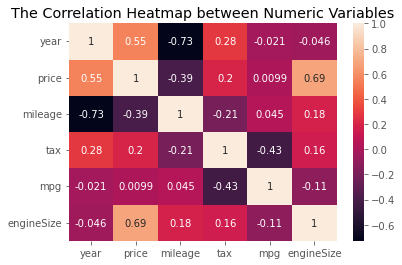

In [14]:
sns.heatmap(car_sales.corr(),annot=True).set(title='The Correlation Heatmap between Numeric Variables')

Here we examine the correlation between numeric variables. We see that our target variable, price, is positively correlated with year and engine size.

[Text(0.5, 1.0, 'The Distribution of EngineSize Variable')]

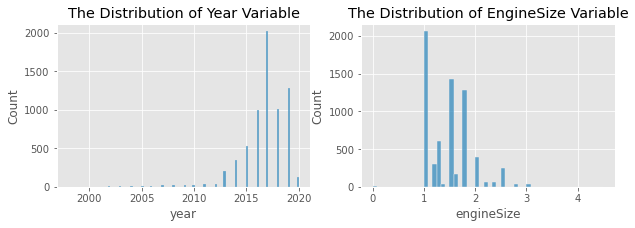

In [16]:
fig, axes = plt.subplots(1,2,figsize=(10,3))
sns.histplot(car_sales['year'],ax=axes[0]).set(title='The Distribution of Year Variable')
sns.histplot(car_sales['engineSize'],ax=axes[1]).set(title='The Distribution of EngineSize Variable')

Since I could not interpret the linear relationship between mpg, tax and mileage and the price variable from the heatmap above, I decided to make a scatterplot to further investigate their nonlinear relationships.

[Text(0.5, 1.0, 'Price vs Mileage')]

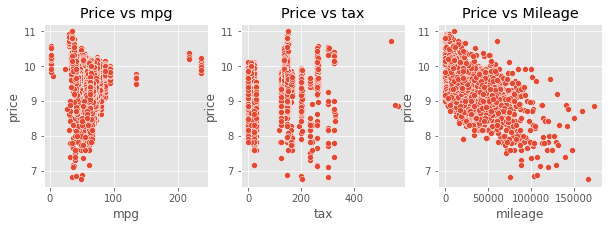

In [17]:
fig, axes = plt.subplots(1,3,figsize=(10,3))
sns.scatterplot(y=car_sales['price'],x=car_sales['mpg'],ax=axes[0]).set(title='Price vs mpg')
sns.scatterplot(y=car_sales['price'],x=car_sales['tax'],ax=axes[1]).set(title='Price vs tax')
sns.scatterplot(y=car_sales['price'],x=car_sales['mileage'],ax=axes[2]).set(title='Price vs Mileage')

From the scatter chart below, there is a linear relationship between mileage and price. There is no correlation between price and mpg. I found out that there are clusters in the scatterplot between price and tax, so I decided to create a new ordinal variable from the tax variable.

In [18]:
# Convert tax variable into an ordinal variable  
car_sales.loc[(car_sales['tax'] <= 100,'tax')] = 1
car_sales.loc[((car_sales['tax'] <= 200) & (car_sales['tax'] > 100) ,'tax')] = 2
car_sales.loc[((car_sales['tax'] <= 300) & (car_sales['tax'] > 200) ,'tax')] = 3
car_sales.loc[(car_sales['tax'] > 300 ,'tax')] = 4

### Categorical Variables - Model, Transmission, fuelType

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


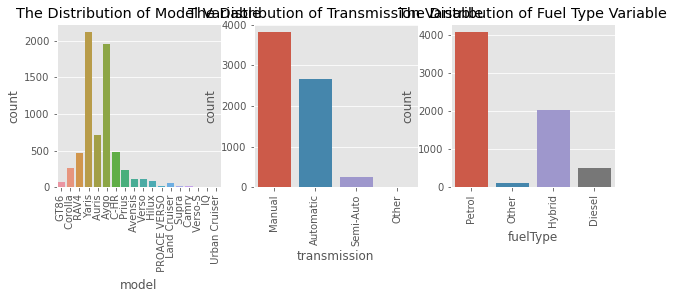

In [19]:
fig, axes = plt.subplots(1,3,figsize=(10,3))
sns.countplot(car_sales['model'],ax=axes[0]).set(title='The Distribution of Model Variable')
sns.countplot(car_sales['transmission'],ax=axes[1]).set(title='The Distribution of Transmission Variable')
sns.countplot(car_sales['fuelType'],ax=axes[2]).set(title='The Distribution of Fuel Type Variable')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

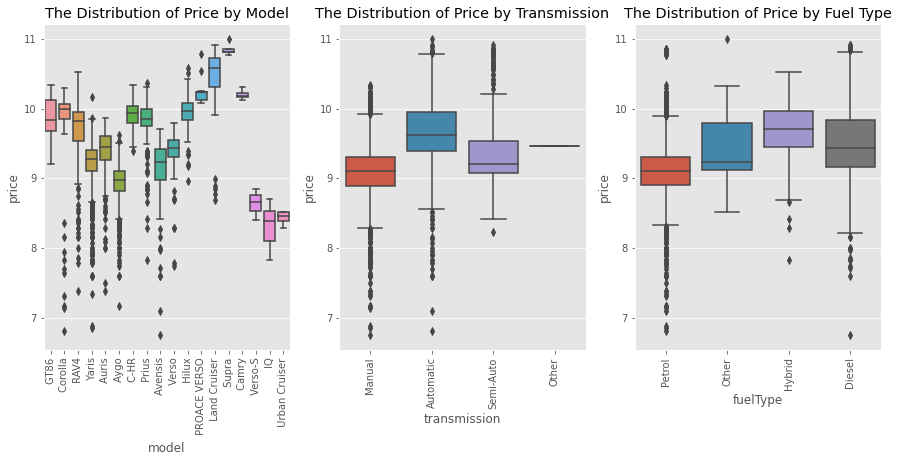

In [20]:
fig, axes = plt.subplots(1,3,figsize=(15,6))
sns.boxplot(data=car_sales, x='model',y='price',ax=axes[0]).set(title='The Distribution of Price by Model')
sns.boxplot(data=car_sales, x='transmission',y='price',ax=axes[1]).set(title='The Distribution of Price by Transmission')
sns.boxplot(data=car_sales, x='fuelType',y='price',ax=axes[2]).set(title='The Distribution of Price by Fuel Type')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

From the bar graphs above we can see the most common categories in model, transmission and fuel type variants - Yaris, Manual, Petrol. From the box plots below, we can see that there is a difference in the distribution of prices between each category in each variable.

# Model Fitting & Evaluation


Predicting the price is a regression problem in machine learning. I am choosing the Linear Regression model because we can see strong to moderate relationship between some features and target variable. The comparison model I am choosing is the Decision Tree regression model because it is easy to interpret with independence from outliers.

For the evaluation, I am choosing R squared and RMSE (Root Mean Squared Error) to evaluate the model. R squared measures how well the model fits dependent variables (i.e. features). RMSE measures how much your predicted results deviate from the actual number.

### Prepare Data for Modelling


To enable modelling, we chose year,model,transmission,mileage,fuelType,tax,engineSize as features, price as target variables. I also have made the following changes:

Normalize the numeric features
Convert the categorical variables into numeric features
Split the data into a training set and a test set

In [21]:
labelencoder = LabelEncoder()
car_sales['model'] = labelencoder.fit_transform(car_sales['model'])
car_sales['transmission'] = labelencoder.fit_transform(car_sales['transmission'])
car_sales['fuelType'] = labelencoder.fit_transform(car_sales['fuelType'])

In [22]:
feature_cols = ['year','transmission','fuelType','engineSize','tax','model','mileage']
X = car_sales[feature_cols] # Features
y = car_sales['price'] # Target variable

In [23]:
# define the scaler 
scaler = PowerTransformer()
# fit and transform the train set
X[['year','engineSize','mileage']] = scaler.fit_transform(X[['year','engineSize','mileage']])

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3211: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:211: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Linear Regression Model

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(X_test)
print('Linear Regression r2_score: ',r2_score(y_test,y_pred))
print('Linear Regression Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

Linear Regression r2_score:  0.8581849461819506
Linear Regression Root Mean Squared Error:  0.17887225682031047


#### Finding the feature importance

Text(0.5, 1.0, 'Feature Importance in Linear Regression Model')

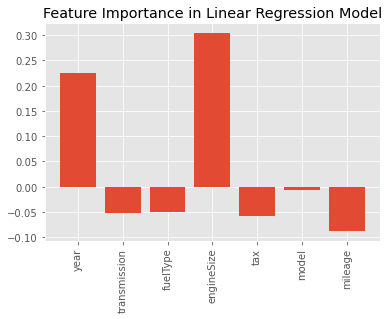

In [27]:
resultdict = {}
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = lr.coef_[i]
    
plt.bar(resultdict.keys(),resultdict.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Linear Regression Model')

#### Decision Tree Regression Model

In [28]:
tree = DecisionTreeRegressor(max_depth=12,min_samples_split=2,random_state=42)
tree.fit(X_train,y_train)
y_pred2 = tree.predict(X_test)

In [29]:
d_r2 = tree.score(X_test, y_test)
print("Decision Tree Regressor R-squared: {}".format(d_r2))

d_mse = mean_squared_error(y_pred2, y_test)
d_rmse = np.sqrt(d_mse)
print("Decision Tree Regressor RMSE: {}".format(d_rmse))

Decision Tree Regressor R-squared: 0.9372190526658075
Decision Tree Regressor RMSE: 0.11901336969163936


Best max_depth is: 12 
Testing R^2 is: 0.9372190526658075


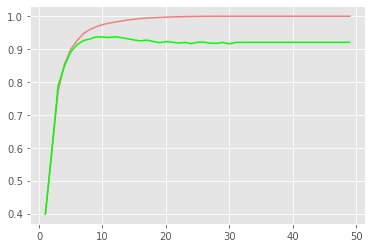

In [30]:
train_score = []
test_score = []
max_score = 0
max_pair = (0,0)

for i in range(1,50):
    tree = DecisionTreeRegressor(max_depth=i,random_state=42)
    tree.fit(X_train,y_train)
    y_pred = tree.predict(X_test)
    train_score.append(tree.score(X_train,y_train))
    test_score.append(r2_score(y_test,y_pred))
    test_pair = (i,r2_score(y_test,y_pred))
    if test_pair[1] > max_pair[1]:
        max_pair = test_pair

fig, ax = plt.subplots()
ax.plot(np.arange(1,50), train_score, label = "Training R^2",color='lightcoral')
ax.plot(np.arange(1,50), test_score, label = "Testing R^2",color='lime')
print(f'Best max_depth is: {max_pair[0]} \nTesting R^2 is: {max_pair[1]}')

#### Finding the feature importance for Decision Tree

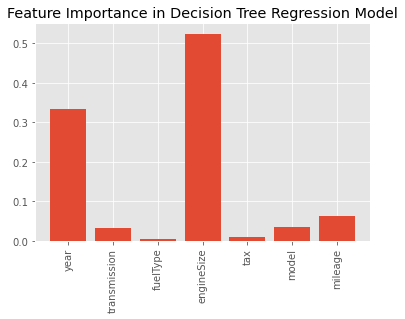

In [31]:
importance = tree.feature_importances_

f_importance = {}
for i in range(len(feature_cols)):
     f_importance[feature_cols[i]] = importance[i]
        
plt.bar(f_importance.keys(),f_importance.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Decision Tree Regression Model');

#### Results
The R squared of the Linear Regression, and the Decision Tree Regression model is 0.86 and 0.94, meaning the Decision Tree Regression model fits the features better. The RMSE of the Linear Regression, and the Decision Tree Regression model is 0.18 and 0.12, meaning the Decision Tree Regression model has less error in predicting values.

#### Evaluate by Business Criteria

The company wants to avoid prediction out of a range - more than £1500 higher from actual price. Therefore, we would consider using percentage of predictions which predicted price is not more than £1500 higher than actual price as a KPI to compare the two models again. The higher the percentage, the better the model performs. 90% of the decision tree regressor prediction is not more than £1500 higher than actual sell price, while the linear regression model only have 87%.

For Linear Reg. Model

In [32]:
X_test['Predicted_price'] = np.round(np.exp(y_pred),0)
X_test['Price'] = np.round(np.exp(y_test),0)
lr_e = X_test

Text(0.5, 1.0, 'Evaluating Linear Regression Model by KPI')

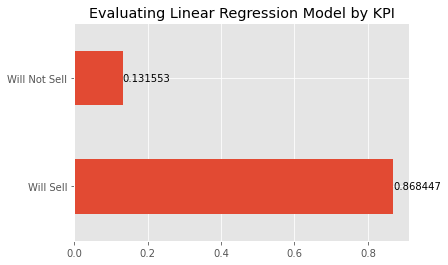

In [33]:
lr_e['Diff'] = lr_e['Predicted_price'] - lr_e['Price']
lr_e['Result'] =  lr_e['Diff'] > 1500
lr_e['Category'] = lr_e['Result'].apply(lambda x: 'Will Not Sell' if x == True else 'Will Sell')
ax = lr_e['Category'].value_counts(normalize=True).plot.barh()
ax.bar_label(ax.containers[0])
ax.set_title('Evaluating Linear Regression Model by KPI')

#### For Decision Tree Reg. Model

In [34]:
X_test['Predicted_price'] = np.round(np.exp(y_pred2),0)
X_test['Price'] = np.round(np.exp(y_test),0)
tree_e = X_test

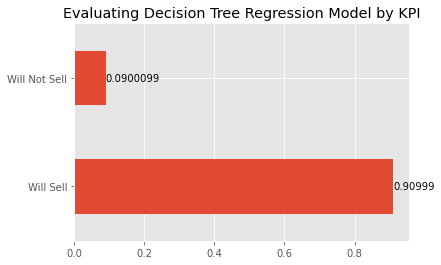

In [35]:
tree_e['Diff'] = tree_e['Predicted_price'] - tree_e['Price']
tree_e['Result'] =  tree_e['Diff'] > 1500
tree_e['Category'] = tree_e['Result'].apply(lambda x: 'Will Not Sell' if x == True else 'Will Sell')
ax = tree_e['Category'].value_counts(normalize=True).plot.barh()
ax.bar_label(ax.containers[0])
ax.set_title('Evaluating Decision Tree Regression Model by KPI');

### Recommendation

To help junior salespeople better predict the price, we can deploy this Decision Tree Regression Model into production. By implementing this model, about 91% of the prediction will make sure the cars is very likely to be sold. This will help junior salespeople build their confidence in generating more sales.

To better evaluate whether this model can really help junior salespeople price used cars, I would also recommend A/B testing about using this model to compare two groups of junior salespeople.

To implement and improve the model, I will consider the following steps:

Looking for best ways to deploy this model in terms of performance and costs. The ideal way is to deploy this machine learning model on edge devices such as mobile and IoT for its convenience and security. However, this might need some work. I will suggest deploying as web services first since it is the easiest way and test the model in newly hired junior salespeople.

Collecting more data, e.g. time and economic data, the inflation has a huge influence on the car price recently

Feature Engineering, e.g reduce the categories in model, create more meaningful features from the variables.

Thank you!

by Cihat Burak Agachan